# 📉 Parametric Density Estimation

**Parametric Density Estimation** is a method of estimating the probability distribution of a dataset by assuming it follows a specific, known mathematical formula (a "model"). 

Instead of letting the data define the shape (as in KDE), we assume the data belongs to a family of distributions (like Normal, Poisson, or Exponential) and focus on finding the specific **parameters** that best fit our observations.

---

### 1. How It Works
The process follows three distinct steps:

1.  **Choose a Model:** Based on prior knowledge or visual inspection (e.g., a histogram), you assume a distribution type. 
    * *Example:* "I assume these heights follow a **Normal Distribution**."
2.  **Identify Parameters:** Every distribution is defined by parameters. 
    * For a Normal Distribution, the parameters are the **Mean ($\mu$)** and **Standard Deviation ($\sigma$)**.
3.  **Estimate Parameters:** Use the observed data to calculate the best values for those parameters, usually via **Maximum Likelihood Estimation (MLE)**.



---

### 2. Common Parametric Models

| Distribution | Parameters | Common Use Case |
| :--- | :--- | :--- |
| **Normal (Gaussian)** | Mean ($\mu$), Std Dev ($\sigma$) | Physical measurements (height, weight, test scores). |
| **Bernoulli / Binomial** | Probability ($p$), Trials ($n$) | Success/Failure events (coin flips, click-through rates). |
| **Poisson** | Rate ($\lambda$) | Counting events over time (customers arriving per hour). |
| **Exponential** | Rate ($\lambda$) | Modeling time between events (waiting times). |

---

### 3. Maximum Likelihood Estimation (MLE)
MLE is the "engine" behind parametric estimation. It asks: 
> *"Which parameters ($\mu, \sigma$) make the data we actually observed the most likely to have occurred?"*

Mathematically, it finds the values that maximize the **Likelihood Function** ($L$):
$$L(\theta) = \prod_{i=1}^{n} f(x_i | \theta)$$

---

### 4. Comparison: Parametric vs. Non-Parametric

| Feature | Parametric Estimation | Non-Parametric (e.g., KDE) |
| :--- | :--- | :--- |
| **Assumption** | Strong (assumes a specific shape). | Weak (no assumed shape). |
| **Complexity** | Simple (only stores a few numbers). | Complex (requires all data points). |
| **Efficiency** | Very efficient with small data. | Requires more data to be accurate. |
| **Risk** | High (if the model choice is wrong). | Low (the data defines the shape). |

[Image comparing a smooth parametric Gaussian curve vs. a wiggly non-parametric KDE curve]

---

### 5. Why use Parametric Estimation?
* **Data Compression:** You only need to store two or three numbers (the parameters) to represent an entire dataset.
* **Predictive Power:** It allows for easy calculation of probabilities for values outside your current dataset.
* **Inference:** The parameters themselves (like the Mean) often provide meaningful scientific insights.

---

**Summary:** Parametric estimation is powerful and efficient but requires you to have a good "guess" about the underlying nature of your data before you begin.

In [1]:
from numpy.random import normal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample = normal(loc = 50, scale = 5,size =1000)

(array([  9.,  43.,  98., 172., 242., 224., 112.,  75.,  21.,   4.]),
 array([36.21114683, 39.13255279, 42.05395874, 44.9753647 , 47.89677066,
        50.81817662, 53.73958257, 56.66098853, 59.58239449, 62.50380045,
        65.4252064 ]),
 <BarContainer object of 10 artists>)

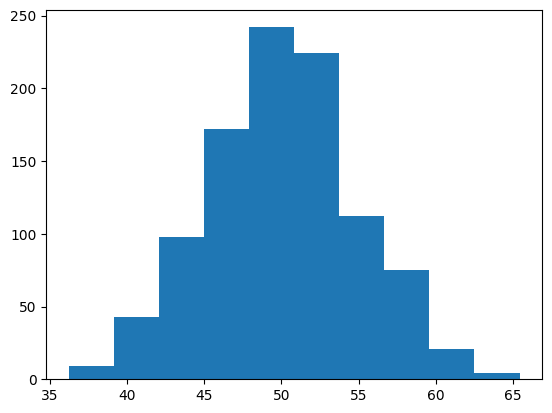

In [3]:
# Ploting the data in hist
plt.hist(sample,bins=10)

In [4]:
# Calculate sample mean and std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [5]:
# fit the sistribution with the above parameters
from scipy.stats import norm

dist = norm(sample_mean,sample_std)

In [6]:
values = np.linspace(sample.min(),sample.max(),100)

In [7]:
probabilities = [dist.pdf(value) for value in values] # PDF

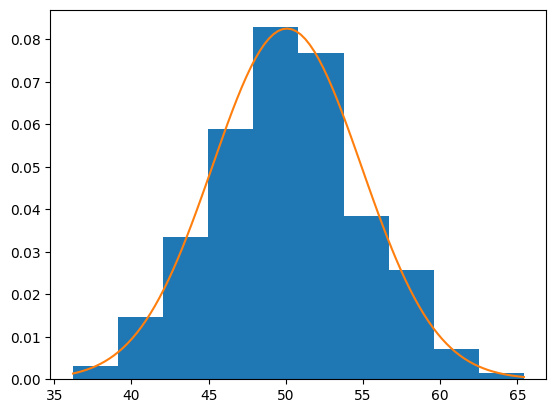

In [8]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)


In [9]:
import seaborn as sns

<Axes: ylabel='Count'>

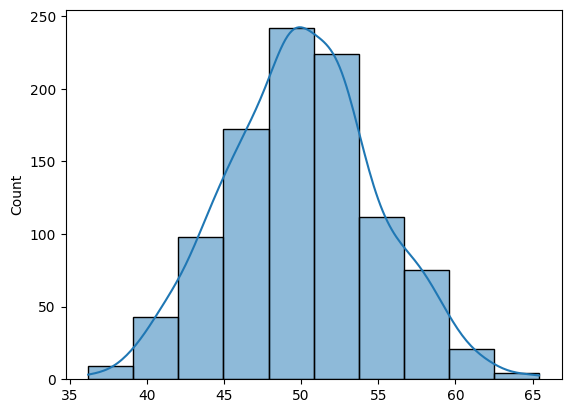

In [10]:
sns.histplot(sample,bins=10,kde=True)